In [15]:
import numpy
import matplotlib.pyplot as plt 
import pandas
import mglearn
import scipy

import sklearn
import sklearn.ensemble  # import seperatley otherwise sub module won't be imported
import sklearn.neural_network # import seperatley otherwise sub module won't be imported

import graphviz
import mpl_toolkits.mplot3d as plt3d

In [194]:
def defFunc(val):
    match val:
        case 0: return "short";
        case 1: return "medium";
        case 2: return "long";
        case _:
            return "error";


Text(0, 0.5, 'relu(x), tanh(x)')

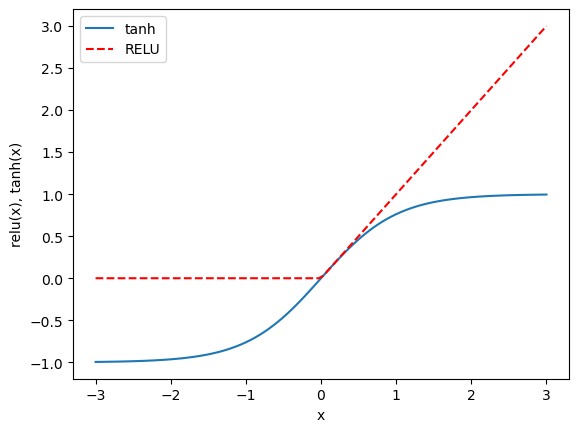

In [12]:
line = numpy.linspace(-3,3,100);
plt.plot(line, numpy.tanh(line), label="tanh");
plt.plot(line, numpy.maximum(line,0),'--r', label="RELU");
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [14]:
X,y = sklearn.datasets.make_moons(n_samples = 100, noise=0.25, random_state=3);
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, stratify=y, random_state=42)

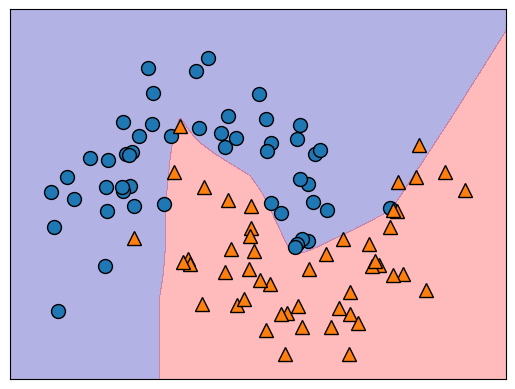

In [27]:
mlp = sklearn.neural_network.MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[100], max_iter=900).fit(X_train, y_train);
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3);
mglearn.discrete_scatter(X[:,0],X[:,1],y);

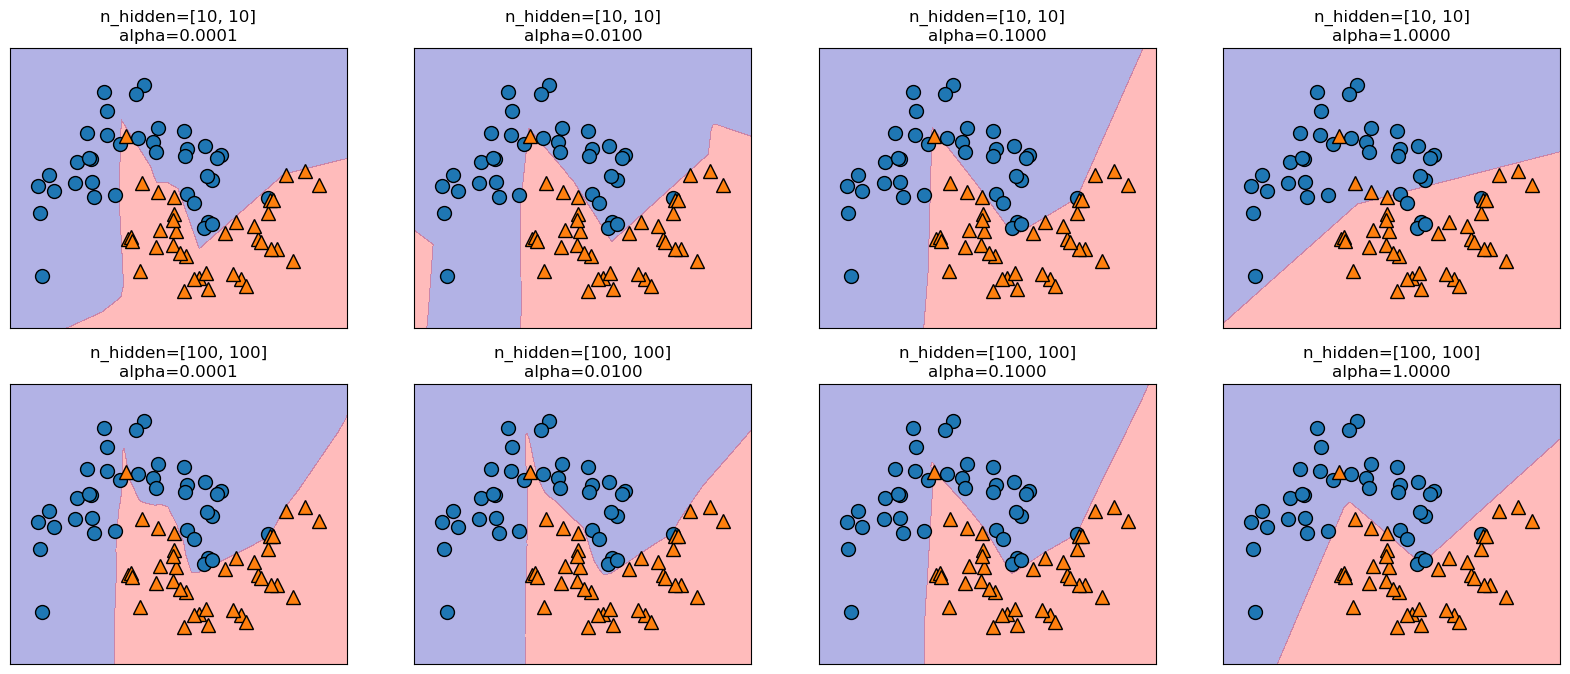

In [33]:
fig, axes = plt.subplots(2,4, figsize=(20, 8));

for axx, n_hidden_nodes in zip(axes,[10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = sklearn.neural_network.MLPClassifier(solver="lbfgs", random_state=0,
                                                   hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],
                                                   alpha=alpha, max_iter=900);
        mlp.fit(X_train, y_train);
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax);
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax);
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha));

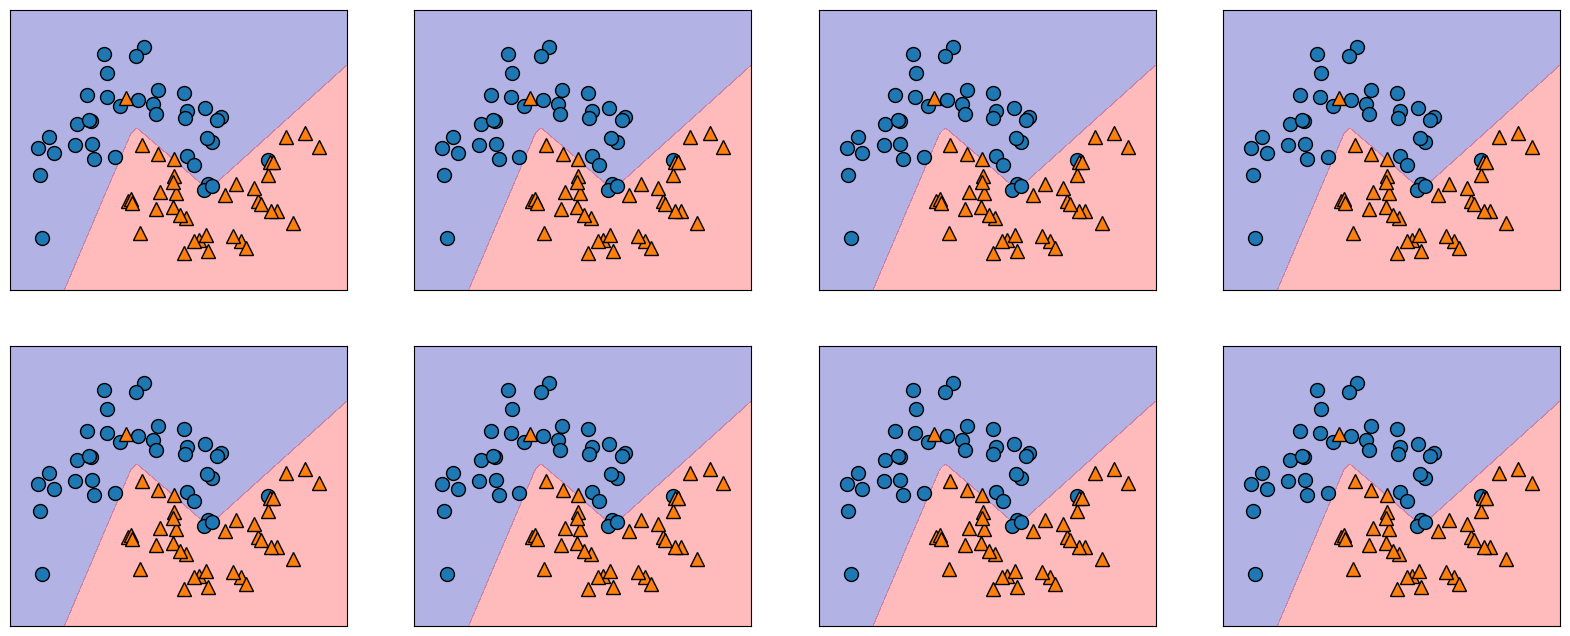

In [36]:
fig, axes = plt.subplots(2,4, figsize=(20, 8));

for i, ax in enumerate(axes.ravel()):
    sklearn.neural_network.MLPClassifier(solver="lbfgs", random_state=i, hidden_layer_sizes=[100,100]);
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax);
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax);

In [57]:
cancer = sklearn.datasets.load_breast_cancer();
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer.data, cancer.target, random_state=0);
mlp = sklearn.neural_network.MLPClassifier(random_state=42);
mlp.fit(X_train, y_train);

print("Accuracy on training set: {:4.3f} %".format(mlp.score(X_train, y_train)*100));
print("Accuracy on training set: {:4.3f} %".format(mlp.score(X_test, y_test)*100));

Accuracy on training set: 93.897 %
Accuracy on training set: 91.608 %


In [66]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0);
mean_on_test = X_test.mean(axis=0)
std_on_test = X_test.std(axis=0);

X_train_scaled = (X_train - mean_on_train) / std_on_train;
X_test_scaled = (X_test - mean_on_test) / std_on_test;

In [79]:
mlp = sklearn.neural_network.MLPClassifier(random_state=0, max_iter=350, solver="adam", alpha=1).fit(X_train_scaled,y_train);
print("Accuracy on training set: {:4.3f}".format(mlp.score(X_train_scaled, y_train)*100))
print("Accuracy on test set: {:4.3f}".format(mlp.score(X_test_scaled, y_test)*100))

Accuracy on training set: 98.826
Accuracy on test set: 96.503


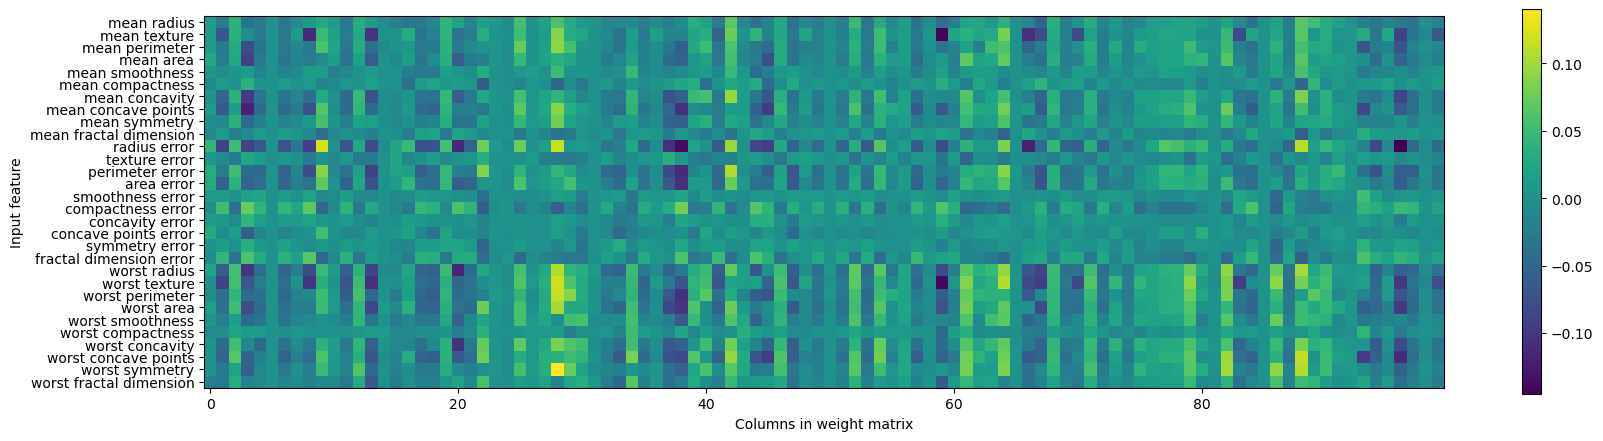

In [96]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none');
plt.yticks(range(30), cancer.feature_names);
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar();

In [131]:
X, y = sklearn.datasets.make_circles(noise=0.25, factor=0.5, random_state=1);
y_named = numpy.array(["Blue", "Red"])[y];
X_train, X_test, y_train_named, y_test_named, y_train, y_test = sklearn.model_selection.train_test_split(X, y_named, y, random_state=0);

gbrt = sklearn.ensemble.GradientBoostingClassifier(random_state = 0);
gbrt.fit(X_train, y_train_named);

print("X_test.shape: {}".format(X_test.shape));
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
print("Decision function: {}".format(gbrt.decision_function(X_test)[:6]))
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

X_test.shape: (25, 2)
Decision function shape: (25,)
Decision function: [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]
Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['Red' 'Blue' 'Blue' 'Blue' 'Red' 'Red' 'Blue' 'Red' 'Red' 'Red' 'Blue'
 'Red' 'Red' 'Blue' 'Red' 'Blue' 'Blue' 'Blue' 'Red' 'Red' 'Red' 'Red'
 'Red' 'Blue' 'Blue']


Test score = 0.0
Train score = 0.0


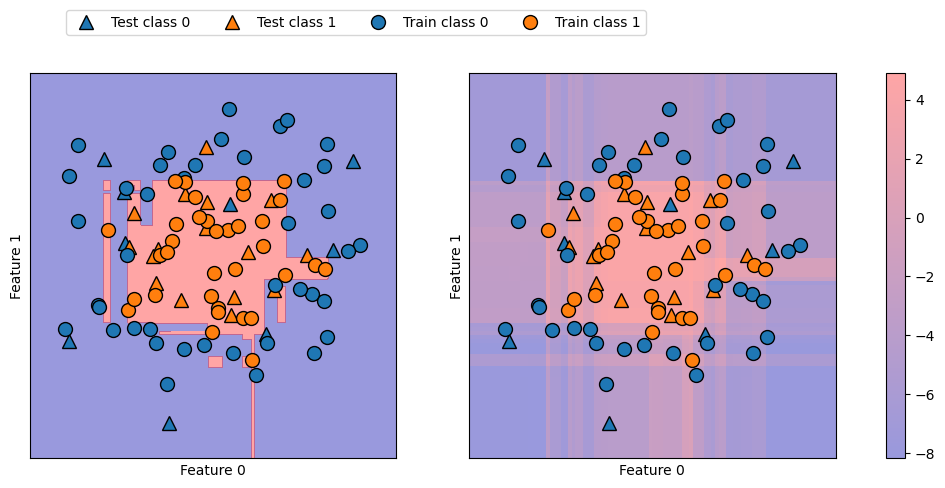

In [152]:
fig, axes = plt.subplots(1,2, figsize=(13,5));
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2);
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl);

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)  
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

print("Test score = {}".format(gbrt.score(X_test, y_test)*100))
print("Train score = {}".format(gbrt.score(X_train, y_train)*100))

cbar = plt.colorbar(scores_image, ax=axes.tolist());
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

In [159]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape));
print("\nPredicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

Shape of probabilities: (25, 2)

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


## Multi Class clasifiers

In [167]:
iris = sklearn.datasets.load_iris();
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(iris.data, iris.target, random_state=42);
gbrt = sklearn.ensemble.GradientBoostingClassifier(learning_rate=0.01, random_state=0);
gbrt.fit(X_train, y_train);

print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape));
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))
print("Score:\n{:4.2f}".format(gbrt.score(X_test, y_test)))

Decision function shape: (38, 3)
Decision function:
[[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]]
Score:
1.00


In [185]:
print("Argmax of predicted probabilities:\n{}".format(numpy.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [218]:
logreg = sklearn.linear_model.LogisticRegression();
named_target = iris.target_names[y_train];
logreg.fit(X_train, named_target);
print("unique classes in training data: {}".format(logreg.classes_));
argmax_dec_func = numpy.argmax(logreg.decision_function(X_test), axis=1);
print("argmax of decision function: {}".format(argmax_dec_func[:5]));
print("argmax combined with classes_: {}".format(logreg.classes_[argmax_dec_func][:5]));

unique classes in training data: ['setosa' 'versicolor' 'virginica']
argmax of decision function: [1 0 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
